In [8]:
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

# Step 1
Generate a linearly separable data set of size 20. Plot the examples {(xn, yn)}
as well as the target function f on a plane. Be sure to mark the examples from different
classes differently, and add labels to the axes of the plot.

Text(0, 0.5, 'y')

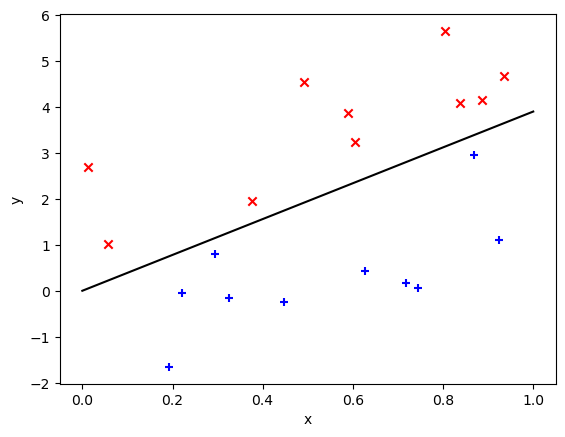

In [69]:
def generate_data(N=20):
    if N % 2 != 0:
        raise ValueError('N must be even')
    slope = 10*(np.random.rand(1) - 0.5)
    intercept = 0#2*(np.random.rand(1) - 0.5)
    target = lambda x:slope*x + intercept
    x = np.random.rand(N)
    y = target(x) + 3*np.concatenate((-np.random.rand(N//2), np.random.rand(N//2)))

    labels = (y > target(x)).astype(int)
    labels[labels == 0] = -1

    return x, y, labels, target

x, y, labels, target = generate_data(20)

xref = np.linspace(0, 1, 100)
plt.plot(xref, target(xref), c='k')
above = y > target(x)
plt.scatter(x[above], y[above], c='r', marker='x')
plt.scatter(x[~above], y[~above], c='b', marker='+')

plt.xlabel('x')
plt.ylabel('y')

# Step 2

Run the perceptron learning algorithm on the data set above. Report the num-
ber of updates that the algorithm takes before converging. Plot the examples {(xn, yn)},
the target function f , and the final hypothesis g in the same figure. Comment on whether
f is close to g.

In [72]:
def perceptron(x, y, labels):
    w = np.zeros(2)
    iterations = 0

    def prediction(w, x, y):
        return np.sign((w[0]*x + w[1]*y))

    def misclassified(w, x, y, sign):
        return sign != prediction(w, x, y)


    indices = np.arange(x.shape[0])
    while np.sum(misclassified(w, x, y, labels)) > 0:
        bad = misclassified(w, x, y, labels)
        this_digit = indices[bad][np.random.randint(0, high=np.sum(bad))]
        w += labels[this_digit]*np.array([x[this_digit], y[this_digit]])
        iterations += 1
    print(f'iterations elapsed: {iterations}')
    return lambda x: -w[0]/w[1]*x
percept_fit = perceptron(x, y, labels)

iterations elapsed: 11


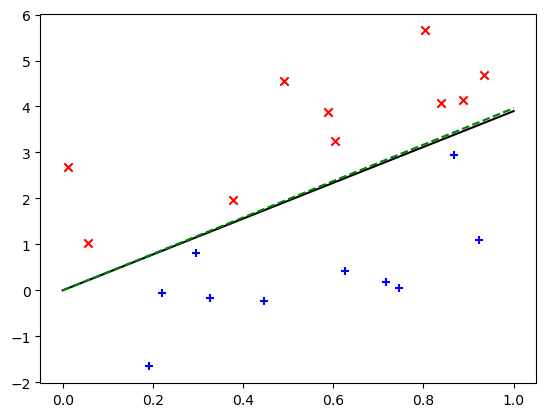

In [73]:
plt.plot(xref, target(xref), c='k')
plt.plot(xref, percept_fit(xref), c='g', ls='--')
above = y > target(x)
plt.scatter(x[above], y[above], c='r', marker='x')
plt.scatter(x[~above], y[~above], c='b', marker='+')

# Repeat experiment at N = 20

iterations elapsed: 36


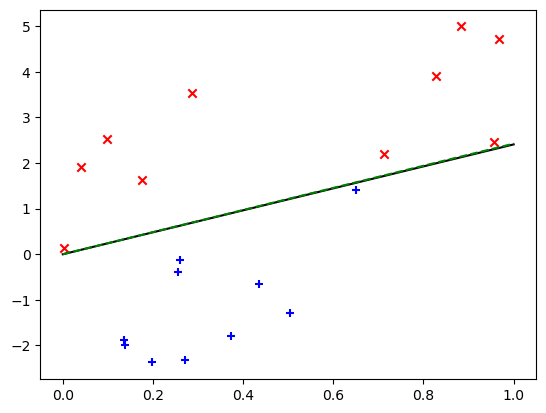

In [75]:
x, y, labels, target = generate_data(20)
percept_fit = perceptron(x, y, labels)
plt.plot(xref, target(xref), c='k')
plt.plot(xref, percept_fit(xref), c='g', ls='--')
above = y > target(x)
plt.scatter(x[above], y[above], c='r', marker='x')
plt.scatter(x[~above], y[~above], c='b', marker='+')

# Repeat experiment with N = 100

iterations elapsed: 2


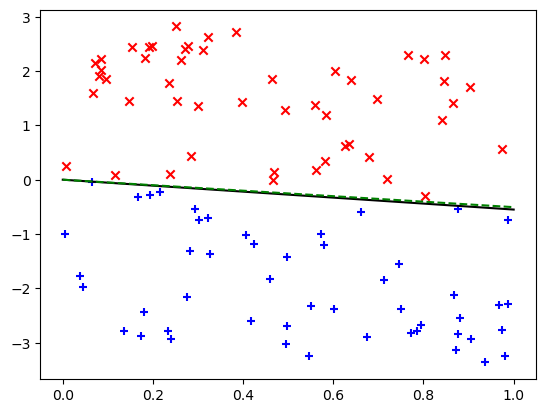

In [76]:
x, y, labels, target = generate_data(100)
percept_fit = perceptron(x, y, labels)
plt.plot(xref, target(xref), c='k')
plt.plot(xref, percept_fit(xref), c='g', ls='--')
above = y > target(x)
plt.scatter(x[above], y[above], c='r', marker='x')
plt.scatter(x[~above], y[~above], c='b', marker='+')

# Repeat experiment with N = 1000

iterations elapsed: 474


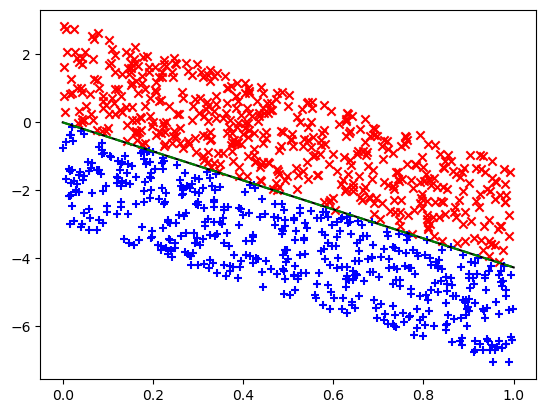

In [77]:
x, y, labels, target = generate_data(1000)
percept_fit = perceptron(x, y, labels)
plt.plot(xref, target(xref), c='k')
plt.plot(xref, percept_fit(xref), c='g', ls='--')
above = y > target(x)
plt.scatter(x[above], y[above], c='r', marker='x')
plt.scatter(x[~above], y[~above], c='b', marker='+')